In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
plt.style.use('thomas')

In [4]:
plt.style.use('thomas')

In [5]:
def Gaussian2D(l,b,p):
    A = p[0]
    l0 = p[1]
    sl = p[2]
    b0 = p[3]
    sb = p[4]
    val = p[0]*np.exp(-0.5*(l-l0)**2/sl**2 -0.5*(b-b0)**2/sb**2)
    return val

In [7]:
deg2rad = np.pi/180
# definition of image space

# minmax range for our data set is full sky
lmin,lmax = -180,180
bmin,bmax = -90,90

# SPI resolution is ~2.5 deg, here we oversample the resolution
binsize = 6
nl_pixels = int(360/binsize)
nb_pixels = int(180/binsize)
#npc = int(n_pixels/2)

bg = np.linspace(bmin,bmax,nb_pixels+1)
lg = np.linspace(lmin,lmax,nl_pixels+1)

b = (bg[1:]+bg[0:-1])/2
l = (lg[1:]+lg[0:-1])/2

# define 2D meshgrid for image coordinates
L_ARRg, B_ARRg = np.meshgrid(lg,bg)
L_ARR, B_ARR = np.meshgrid(l,b)

# define solid angle for each pixel for normalisations later
domega = (binsize*deg2rad)*(np.sin(np.deg2rad(B_ARR+binsize/2)) - np.sin(np.deg2rad(B_ARR-binsize/2)))

In [8]:
# disk
F_disk = 1.7e-3
l0_disk = 0
b0_disk = 0
sl_disk = 60
sb_disk = 10.5

par_disk = [1.,l0_disk,sl_disk,b0_disk,sb_disk]

map_disk = Gaussian2D(L_ARR,B_ARR,par_disk)

# renorm
map_disk = map_disk/np.sum(map_disk*domega)*F_disk

# check flux
print(np.sum(map_disk*domega))

0.0017000000000000001


In [9]:
# BB
F_BB = 7.3e-4
l0_BB = 0
b0_BB = 0
sl_BB = 8.7
sb_BB = 8.7

par_BB = [1.,l0_BB,sl_BB,b0_BB,sb_BB]

map_BB = Gaussian2D(L_ARR,B_ARR,par_BB)

# renorm
map_BB = map_BB/np.sum(map_BB*domega)*F_BB

# check flux
print(np.sum(map_BB*domega))

0.0007300000000000001


In [10]:
# NB
F_NB = 2.8e-4
l0_NB = -1.15
b0_NB = -0.25
sl_NB = 2.5
sb_NB = 2.5

par_NB = [1.,l0_NB,sl_NB,b0_NB,sb_NB]

map_NB = Gaussian2D(L_ARR,B_ARR,par_NB)

# renorm
map_NB = map_NB/np.sum(map_NB*domega)*F_NB

# check flux
print(np.sum(map_NB*domega))

0.00028


In [11]:
# GCS
F_GCS = 8.2e-5
l0_GCS = -0.06
b0_GCS = -0.05
sl_GCS = 1.3
sb_GCS = 1.3

par_GCS = [1.,l0_GCS,sl_GCS,b0_GCS,sb_GCS]

map_GCS = Gaussian2D(L_ARR,B_ARR,par_GCS)

# renorm
map_GCS = map_GCS/np.sum(map_GCS*domega)*F_GCS

# check flux
print(np.sum(map_GCS*domega))

8.2e-05


In [12]:
map_tot = map_disk + map_BB + map_NB + map_GCS*1
print(np.sum(map_tot*domega))

0.002792


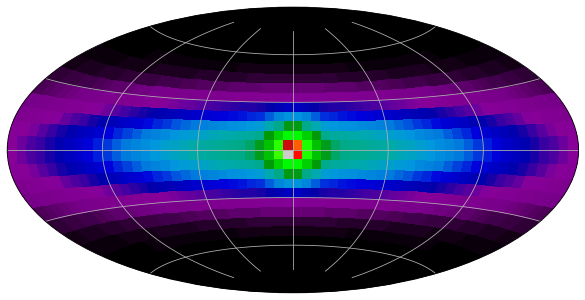

In [13]:
plt.figure(figsize=(10.24,7.68))

plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               map_tot,
               #cmap=plt.cm.twilight_shifted,
               cmap=plt.cm.nipy_spectral,
               norm=colors.PowerNorm(0.33),
               rasterized=True)

plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=['','','','',''],color='lightgray')
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad,labels=['','','','',''])

#plt.xlabel('Gal. Lon. [deg]')
#plt.ylabel('Gal. Lat. [deg]')
plt.grid()

plt.savefig('Siegert2016_511keVmap_nipy_spectral_cuberoot.pdf')

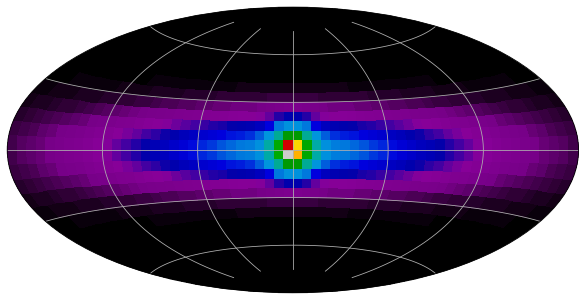

In [14]:
plt.figure(figsize=(10.24,7.68))

plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               map_tot,
               #cmap=plt.cm.twilight_shifted,
               cmap=plt.cm.nipy_spectral,
               norm=colors.PowerNorm(0.5),
               rasterized=True)

plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=['','','','',''],color='lightgray')
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad,labels=['','','','',''])

#plt.xlabel('Gal. Lon. [deg]')
#plt.ylabel('Gal. Lat. [deg]')
plt.grid()

plt.savefig('Siegert2016_511keVmap_nipy_spectral_squareroot.pdf')

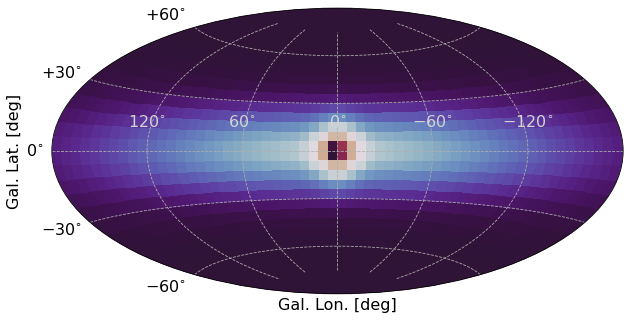

In [15]:
plt.figure(figsize=(10.24,7.68))

plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               map_tot,
               cmap=plt.cm.twilight_shifted,
               #cmap=plt.cm.nipy_spectral,
               norm=colors.PowerNorm(0.33),
               rasterized=True)

plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=[r'$120^{\circ}$'+'\n',
                                                         r'$60^{\circ}$'+'\n',
                                                         r'$0^{\circ}$'+'\n',
                                                         r'$-60^{\circ}$'+'\n',
                                                         r'$-120^{\circ}$'+'\n'],color='lightgray')
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad,labels=[r'$-60^{\circ}$',
                                                       r'$-30^{\circ}$',
                                                       r'$0^{\circ}$',
                                                       r'$+30^{\circ}$',
                                                       r'$+60^{\circ}$'])

plt.xlabel('Gal. Lon. [deg]')
plt.ylabel('Gal. Lat. [deg]')
plt.grid(linestyle='--')

plt.savefig('Siegert2016_511keVmap_twilight_shifted_cuberoot_labels.pdf')

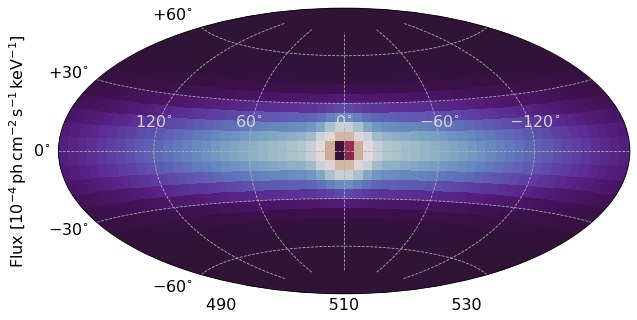

In [16]:
plt.figure(figsize=(10.24,7.68))

plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               map_tot,
               cmap=plt.cm.twilight_shifted,
               #cmap=plt.cm.nipy_spectral,
               norm=colors.PowerNorm(0.33),
               rasterized=True)

plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=[r'$120^{\circ}$'+'\n',
                                                         r'$60^{\circ}$'+'\n',
                                                         r'$0^{\circ}$'+'\n',
                                                         r'$-60^{\circ}$'+'\n',
                                                         r'$-120^{\circ}$'+'\n'],color='lightgray')
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad,labels=[r'$-60^{\circ}$',
                                                       r'$-30^{\circ}$',
                                                       r'$0^{\circ}$',
                                                       r'$+30^{\circ}$',
                                                       r'$+60^{\circ}$'])

plt.xlabel('490                  510                  530')
plt.ylabel(r'Flux [$10^{-4}\,\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')
plt.grid(linestyle='--')



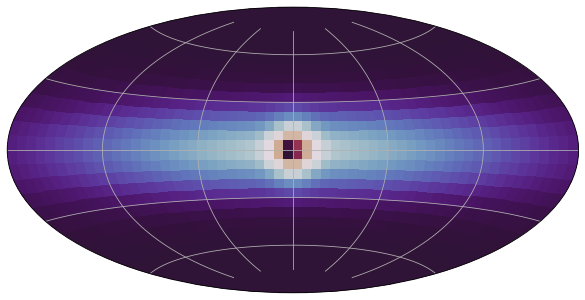

In [17]:
plt.figure(figsize=(10.24,7.68))

plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               map_tot,
               cmap=plt.cm.twilight_shifted,
               #cmap=plt.cm.nipy_spectral,
               norm=colors.PowerNorm(0.33),
               rasterized=True)

plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=['','','','',''],color='lightgray')
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad,labels=['','','','',''])

#plt.xlabel('Gal. Lon. [deg]')
#plt.ylabel('Gal. Lat. [deg]')
plt.grid()

plt.savefig('Siegert2016_511keVmap_twilight_shifted_cuberoot.pdf')

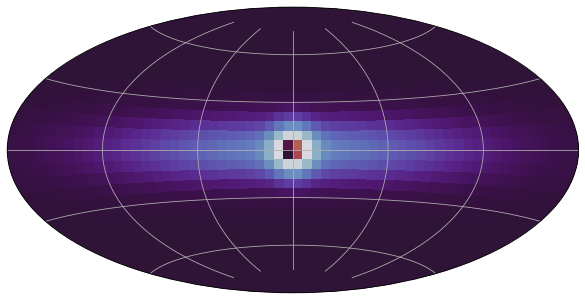

In [18]:
plt.figure(figsize=(10.24,7.68))

plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               map_tot,
               cmap=plt.cm.twilight_shifted,
               #cmap=plt.cm.nipy_spectral,
               norm=colors.PowerNorm(0.5),
               rasterized=True)

plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=['','','','',''],color='lightgray')
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad,labels=['','','','',''])

#plt.xlabel('Gal. Lon. [deg]')
#plt.ylabel('Gal. Lat. [deg]')
plt.grid()

plt.savefig('Siegert2016_511keVmap_twilight_shifted_squareroot.pdf')

In [19]:
from astropy.io import fits

In [32]:
from astropy import wcs
wcs = wcs.WCS(naxis=2)
nx = 60
ny = 30
pixscalelon = np.diff(l)[0] # cdelt1
pixscalelat = np.diff(b)[0]  # cdelt2

# smaller selection
#small = np.where((np.abs(L_ARR) < 25) & (np.abs(B_ARR) < 25))

wcs.wcs.crpix = [30., 15.] # Ref pixel for axis 1 and 2
wcs.wcs.cdelt = np.array([pixscalelon, pixscalelat]) # what is the pixel scale in lon, lat.
wcs.wcs.crval = [l[29],b[14]] #what is the galactic coordinate of that pixel.
wcs.wcs.ctype = ["GLON-CAR", "GLAT-CAR"] #CAR projection #AIT projection

In [33]:
import datetime
today = datetime.date.today()

In [34]:
# write wcs to fits header
# change this stuff accordingly
header = wcs.to_header()
header['history'] = "Thomas Siegert [tsiegert@ucsd.edu] created this file on "+str(today)+" " 
header['comment'] = "model mal for 511 keV emission;" 

# define header
hdu = fits.PrimaryHDU(map_tot,header=header)

# save file
hdu.writeto('511keV_map_6deg.fits', overwrite=True)

In [31]:
np.where(map_tot == np.max(map_tot))

(array([182]), array([362]))

In [32]:
l[362],b[182]

(1.25, 1.25)

In [33]:
np.min(map_tot),np.max(map_tot)

(2.2058461468961044e-21, 1.095785007225646)